# Drawing and Styling Boxplots with pandas and matplotlib

Creating basic plots with `matplotlib` is fairly simple, but the default parameters may result in a plot that is difficult to parse. In this tutorial, I'll demonstrate how to use `matplotlib` and a `pandas` dataframe to create a simple boxplot, and how to style different elements of a `matplotlib` boxplot so that the final product will be easier to parse and more visually appealing.

The plots in this tutorial are generated from publicly available data on the Titanic disaster, which is available for download as an Excel spreadsheet at http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

*This tutorial assumes some familiarity with python.*

## Reading in the Data and Generating the Boxplot

To begin, we'll need to import `pandas` and `matplotlib`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

Now, we can read in the Titanic dataset. The dataset is formatted as an Excel spreadsheet, so we'll use `pandas`' `read_excel` function to read it into a dataframe object. We can then call the `pandas` function `boxplot` as a method of our dataframe to generate a simple box-and-whiskers plot.

Using the `column` and `by` parameters, we'll generate a set of boxplots that displays passenger ages, grouped by passenger class.

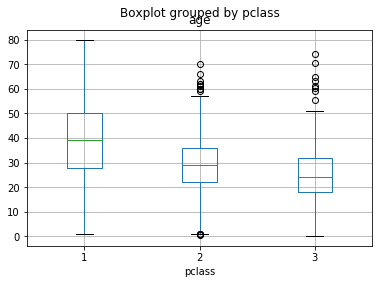

In [2]:
titanic_df = pd.read_excel('titanic3.xls', 'titanic3',
                           index_col=None, na_values=[''])
titanic_df.boxplot(column='age', by='pclass')

This default plot isn't especially elegant, but serves as a decent base. Even now, you can begin to make some simple observations – the median age dips from first to third class, and the interquartile range shrinks. In third and second classes, there are some interesting outliers.

To someone unfamiliar with the dataset, however, this plot could be more helpful. The default x-axis label, *pclass*, is not immediately clear. `matplotlib` has generated two titles – one for the individual subplot and one for the whole figure – which overlap. These default titles, *Boxplot grouped by pclass age* and *age*, also do not clarify much. 

To make our boxplot clearer, we'll start by setting a new default title, as well as new labels for the x- and y-axes.

Text(0,0.5,'Age')

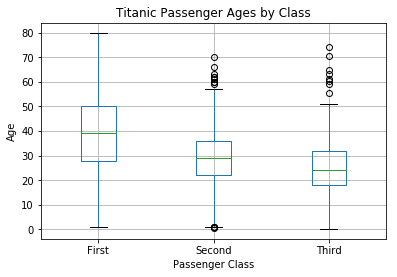

In [3]:
fig, ax = plt.subplots() # plt.subplots() returns a tuple containing  
                         # a figure and axes object. Having an axes 
                         # object helps with styling, and we'll need
                         # a figure object to save our plot.
titanic_df.boxplot(column='age', by='pclass', ax=ax)

plt.suptitle('') # Clearing the figure suptitle
plt.title('Titanic Passenger Ages by Class') 

ax.set_xlabel('Passenger Class')
ax.set_xticklabels(('First', 'Second', 'Third'))
ax.set_ylabel('Age')

Clearer, but there's still room for improvement. 

We can start making the graph a little more clear, and a little more visually appealing, by modifying our new title and axis labels.

## Styling Text
Any text object rendered by `matplotlib` can be styled like text generated with `matplotlib`'s `text` function. The labels and title we just generated are text objects, so we can do some styling by adding in keyword arguments when we call the function that generates them.

We can italicize our title by supplying the keyword argument `style='italic'`, and adjust the size of text by using the `fontsize` argument. We'll also adjust the size of our x- and y-axis labels so that they are larger than the x-tick labels, but smaller than the title.

Text can be colored using the `color` argument. The `color` argument can take a few different values, including hexademical color codes and some basic color names. Supplying the `color` argument with a value between 0 and 1 will color it a shade of gray, values closer to 0 being darker. In the example below, the x-tick labels are colored dark gray.

*A full list of `text` keyword arguments can found at https://matplotlib.org/api/text_api.html#matplotlib.text.Text*

The new code block, and the updated boxplot, will look like this:

Text(0,0.5,'Age')

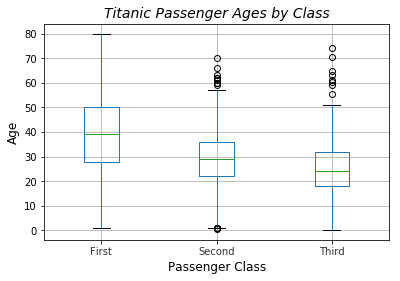

In [4]:
fig, ax = plt.subplots()
titanic_plot = titanic_df.boxplot(column='age', by='pclass', ax=ax)

plt.suptitle('')
plt.title('Titanic Passenger Ages by Class', fontsize=14, style='italic') 

ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_xticklabels(('First', 'Second', 'Third'), color='0.20')
ax.set_ylabel('Age', fontsize=12)

## Styling Lines and Patches
Color will take a little more work than text. 

`matplotlib` builds its boxplots out of many different `Line2D` objects, so we can be style these lines like any other line object. The standard `matplotlib` function for boxplots returns a dictionary with keys for important lines or groups of lines in the boxplot (there are six: `'boxes'`, `'medians'`, `'whiskers'`, `'caps'`, and `'fliers'`). 

The `pandas` version of the function, which we need to use if we're graphing from a dataset, does not provide that dictionary by default. However, the function will return a dictionary if we pass the argument `return_type='dict'` into the `boxplot` function. We'll pass the `return_type` argument in, and also pass the argument `patch_artist=True`, which will let `matplotlib` know to fill the body of the boxplot (`'boxes'`) with a patch of color. This will let us style the inside of the boxes.

We can change colors and add hatching patterns by calling the `matplotlib` function `set` as a method of our lines.

*A full list of `Line2D` keyword arguments can be found at https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D*

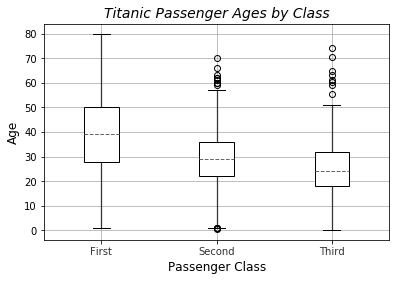

In [5]:
fig, ax = plt.subplots()
titanic_plot = titanic_df.boxplot(column='age', by='pclass', ax=ax, 
                                  return_type='dict', patch_artist=True)

boxes = titanic_plot['age']['boxes']
whiskers = titanic_plot['age']['whiskers']
medians = titanic_plot['age']['medians']

plt.suptitle('')
plt.title('Titanic Passenger Ages by Class', fontsize=14, style='italic') 

ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_xticklabels(('First', 'Second', 'Third'), color='0.20')
ax.set_ylabel('Age', fontsize=12)

for box in boxes:
    box.set(color='black')
    box.set(facecolor='white')
    
for whisker in whiskers:
    whisker.set(color='0.2', linewidth='1.25')
    
for median in medians:
    median.set(color='0.4', linestyle='dashed')

## Visualizing Additional Data

With `matplotlib`, it's easy to draw horizontal or vertical lines to represent data. To help compare the full dataset with our boxplots, let's draw a line representing the median for the whole set of data, all three passenger classes. To begin, let's calculate that value.

In [6]:
median_age = titanic_df['age'].median()
print(median_age)

28.0


To create this line, we'll instantiate an instance of the object `axhline`, and set its y-position equal to the median we just caculated. We can style this line like most other `matplotlib` objects - to make sure it doesn't stand out too much, we'll decrease the line width, `color` the line light gray, and change the style of the line to `'dashed'`. 

Then, we'll create a legend. The legend will automatically be populated by the horizontal line object's label and styling.

Normally, the legend draws inside the boundaries of the figure. In this case, there's not a good place inside the plot area to put the legend that wouldn't cover up information, so we'll render it outside the plot area instead by passing in the argument `bbox_to_anchor`.

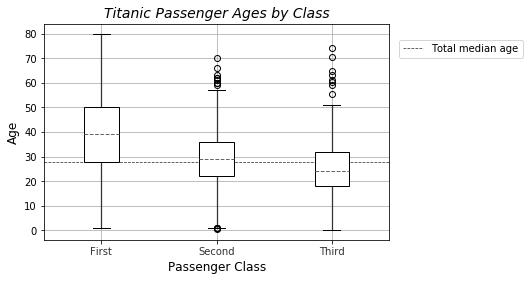

In [7]:
fig, ax = plt.subplots()
titanic_plot = titanic_df.boxplot(column='age', by='pclass', ax=ax,
                                  return_type='dict', patch_artist=True)

boxes = titanic_plot['age']['boxes']
whiskers = titanic_plot['age']['whiskers']
medians = titanic_plot['age']['medians']

median_age = titanic_df['age'].median()

plt.suptitle('')
plt.title('Titanic Passenger Ages by Class', fontsize=14, style='italic') 

ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_xticklabels(('First', 'Second', 'Third'), color='0.20')
ax.set_ylabel('Age', fontsize=12)

for box in boxes:
    box.set(color='black')
    box.set(facecolor='white')
    
for whisker in whiskers:
    whisker.set(color='0.2', linewidth='1.25')
    
for median in medians:
    median.set(color='0.4', linestyle='dashed')

ax.axhline(y=median_age, color='0.20', linestyle='dashed',
           linewidth=.75, label='Total median age')
ax.legend(bbox_to_anchor=(1.4, .95))

## Exporting the Boxplot
We can save our figure by calling the `savefig` function as a method of our figure. To ensure that our legend isn't cut off, however, we'll call the `tight_layout` function first, and then pass the argument `bbox_extra_artists=(legend,)` to `savefig`.

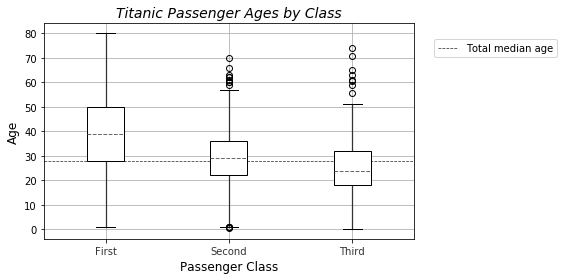

In [8]:
fig, ax = plt.subplots()
titanic_plot = titanic_df.boxplot(column='age', by='pclass', ax=ax,
                                  return_type='dict', patch_artist=True)

boxes = titanic_plot['age']['boxes']
whiskers = titanic_plot['age']['whiskers']
medians = titanic_plot['age']['medians']

median_age = titanic_df['age'].median()

plt.suptitle('')
plt.title('Titanic Passenger Ages by Class', fontsize=14, style='italic') 

ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_xticklabels(('First', 'Second', 'Third'), color='0.20')
ax.set_ylabel('Age', fontsize=12)

for box in boxes:
    box.set(color='black')
    box.set(facecolor='white')
    
for whisker in whiskers:
    whisker.set(color='0.2', linewidth='1.25')
    
for median in medians:
    median.set(color='0.4', linestyle='dashed')

ax.axhline(y=median_age, color='0.20', linestyle='dashed',
           linewidth=.75, label='Total median age')
legend = ax.legend(bbox_to_anchor=(1.4, .95))

plt.tight_layout()
fig.savefig('foo.png', bbox_extra_artists=(legend,), bbox_inches='tight')

Done! The finished plot is saved and ready to share. 